In [1]:
import numpy as np
import pandas as pd
from pandas import Grouper
import os
from matplotlib import pyplot as plt
import seaborn as sns
import cufflinks as cf
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [45]:
db = pd.read_csv('db.csv', 
                         sep=';',
                         on_bad_lines='skip',
                         names=["TICKER", "DATE", "SIGN", "ROBERTA", "VADERS", "ADJ_CLOSE", "HIGH", "VOLUME"],
                         skiprows=1)

#db['DATE'] = pd.to_datetime(db['DATE'], format='%Y-%M-%d')
db['DATE'] = pd.to_datetime(db['DATE'], errors='coerce')

db

,TICKER,DATE,SIGN,ROBERTA,VADERS,ADJ_CLOSE,HIGH,VOLUME
2304675,A,2013-12-02,scorpio,-0.711911,0.0387,NaN,NaN,NaN
2304676,A,2013-12-03,scorpio,-0.450335,0.5859,-0.526240,-0.931611,69.748517
2304680,A,2013-12-04,scorpio,0.334660,0.8979,1.228044,1.241302,-2.469171
2304681,A,2013-12-05,scorpio,0.351063,0.7960,-0.149309,-0.055737,-25.059221
2304685,A,2013-12-06,scorpio,0.811505,0.2315,2.485975,2.100378,68.655419
...,...,...,...,...,...,...,...,...
1834702,ZYNE,2016-12-06,leo,-0.246660,0.7703,9.711682,4.571431,49.317073
1834705,ZYNE,2016-12-07,leo,-0.461272,0.3818,0.345783,0.136609,-39.268213
1834708,ZYNE,2016-12-08,leo,-0.278893,0.1531,7.029631,7.230562,74.771382
1834711,ZYNE,2016-12-09,leo,0.355984,0.6577,-2.962009,5.534350,7.510003


In [10]:
#db.groupby('SIGN').ADJ_CLOSE.iplot(kind='kde', legend=True)
db_5D = db[db.DATE >= pd.Timestamp(2016,1,1)].groupby(['SIGN',pd.Grouper(key='DATE', axis=0, freq='5D')]).agg({'ADJ_CLOSE':'mean','ROBERTA':'mean'}).reset_index()
fig = px.bar(db_5D, x="DATE", y="ADJ_CLOSE", color="SIGN")
fig.show()

In [9]:
db['ROBERTA_ADJ_CLOSE_SCORE'] = db['ROBERTA']*db['ADJ_CLOSE']
db['VADERS_ADJ_CLOSE_SCORE'] = db['VADERS']*db['ADJ_CLOSE']
db['ROBERTA_HIGH_SCORE'] = db['ROBERTA']*db['HIGH']
db['VADERS_HIGH_SCORE'] = db['VADERS']*db['HIGH']
db['ROBERTA_VOLUME_SCORE'] = db['ROBERTA']*db['VOLUME']
db['VADERS_VOLUME_SCORE'] = db['VADERS']*db['VOLUME']

(array([21366.,  3170.,  3003.,  2576.,  2085.,  3501.,  2153.,  2379.,
         2910.,  2777.,  2273.,  2253.,  2448.,  3199.,  3521.,  3491.,
         3403.,  4165.,  4259.,  4478.,  4705.,  4982.,  5815.,  6117.,
         6151.,  6659.,  7045.,  7963.,  8262.,  8928.,  9807., 10423.,
        11429., 11961., 13031., 14120., 15060., 16766., 17937., 18893.,
        20314., 21407., 22716., 23524., 25289., 26729., 28040., 29816.,
        31654., 33273., 33764., 36083., 37149., 39787., 41038., 42355.,
        44321., 46075., 47407., 49158., 50263., 51805., 53522., 55998.,
        55603., 57822., 58143., 59174., 60238., 60374., 61617., 62074.,
        62813., 61963., 62741., 62954., 61789., 62030., 60906., 60594.,
        59111., 58824., 57409., 56877., 55091., 54303., 53467., 51851.,
        50182., 49090., 47096., 45254., 44316., 42428., 40440., 39363.,
        36969., 35285., 33774., 32213., 30308., 28323., 26650., 25610.,
        23282., 22138., 20701., 19289., 17874., 16421., 15189., 

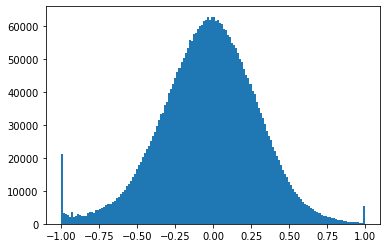

In [10]:
plt.hist(db.ADJ_CLOSE, range=[-1,1], bins=150)

(array([   0.,    0.,    0., 1239.,  622.,    0.,  931.,  614., 1556.,
        1858.,  309.,  912., 1537., 1841., 1852., 1857., 1858., 1533.,
        1531., 1545., 1537., 1562.,  302., 1852., 1542.,  626., 1876.,
         924., 1231.,  625.,  611., 1545.,  314., 1224.,  614., 2477.,
         619., 1238., 1843.,  927., 1537.,  296., 1229., 1830., 1552.,
        2780., 3105., 1863.,  940., 2784.]),
 array([-1.  , -0.96, -0.92, -0.88, -0.84, -0.8 , -0.76, -0.72, -0.68,
        -0.64, -0.6 , -0.56, -0.52, -0.48, -0.44, -0.4 , -0.36, -0.32,
        -0.28, -0.24, -0.2 , -0.16, -0.12, -0.08, -0.04,  0.  ,  0.04,
         0.08,  0.12,  0.16,  0.2 ,  0.24,  0.28,  0.32,  0.36,  0.4 ,
         0.44,  0.48,  0.52,  0.56,  0.6 ,  0.64,  0.68,  0.72,  0.76,
         0.8 ,  0.84,  0.88,  0.92,  0.96,  1.  ]),
 <BarContainer object of 50 artists>)

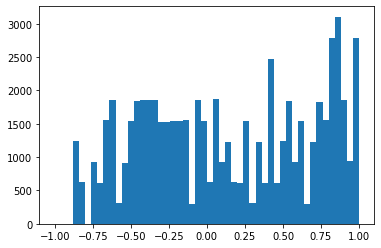

In [32]:
plt.hist(CAPRICORN.ROBERTA, range=[-1,1], bins=50)

<AxesSubplot: xlabel='DATE'>

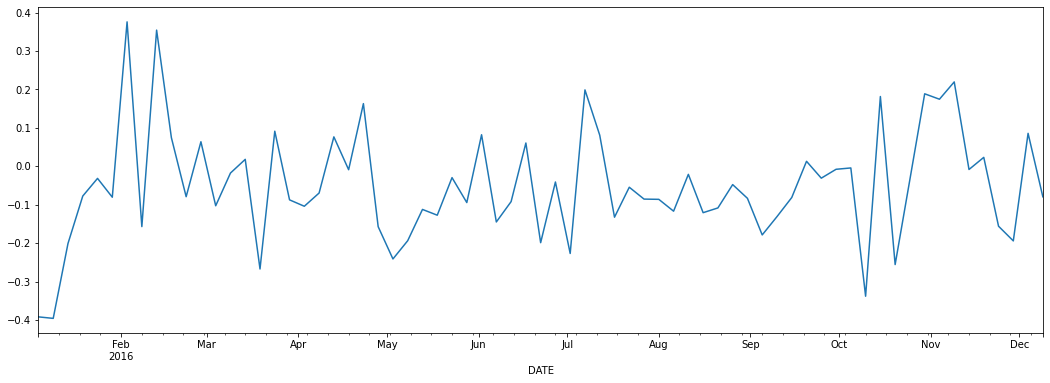

In [16]:
AA = db[(db.TICKER == 'AA') & (db.DATE >= pd.Timestamp(2016,1,1))]
db_5D_AA = AA.groupby(pd.Grouper(key='DATE', axis=0, freq='5D')).agg({'ADJ_CLOSE_NORM':'mean','SIGN':'max','ROBERTA':'mean'})
db_5D_AA.ADJ_CLOSE_NORM.plot(figsize=(18,6))
#plt.plot(db_5D.ADJ_CLOSE_NORM)
#plt.show()

<AxesSubplot: xlabel='DATE'>

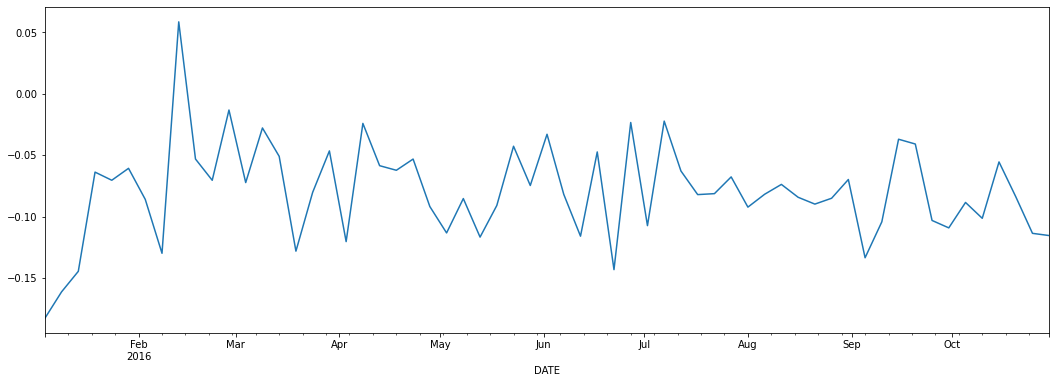

In [15]:
CAPRICORN = db[(db.SIGN == 'capricorn') & (db.DATE >= pd.Timestamp(2016,1,1))& (db.DATE <= pd.Timestamp(2016,11,1))]
db_5D_capricorn = CAPRICORN.groupby(pd.Grouper(key='DATE', axis=0, freq='5D')).agg({'ADJ_CLOSE_NORM':'mean','ROBERTA':'mean'})
db_5D_capricorn.ADJ_CLOSE_NORM.plot(figsize=(18,6))

In [7]:
db_5D_cancer.describe()

,ADJ_CLOSE_NORM,ROBERTA
count,69.000000,69.000000
mean,13.113374,0.107160
std,107.940160,0.344992
min,-1.349816,-0.784119
25%,-0.269542,-0.143450
50%,0.157697,0.092922
75%,0.399097,0.360823
max,896.723781,0.883941


In [13]:
db.ADJ_CLOSE_NORM.max()

14999900.335276162

In [16]:
AA_capricorn = db_5D_AA.ADJ_CLOSE_NORM*db_5D_cancer.ADJ_CLOSE_NORM
print(AA_capricorn)

DATE
2016-01-04    5.179090
2016-01-09    5.366806
2016-01-14    0.670645
2016-01-19   -0.013250
2016-01-24   -0.122717
                ...   
2016-11-19         NaN
2016-11-24         NaN
2016-11-29         NaN
2016-12-04         NaN
2016-12-09         NaN
Freq: 5D, Name: ADJ_CLOSE_NORM, Length: 69, dtype: float64


## ACCURACY ##

In [57]:
print(min(db['DATE']))
db = db[db['DATE']>min(db['DATE'])]
print(min(db['DATE']))

2013-12-04 00:00:00
2013-12-05 00:00:00


In [82]:
#db2 = db[(db['VADERS'] >= 0.7) | (db['VADERS'] <= -0.7)]
db2 = db.groupby(['SIGN',pd.Grouper(key='DATE', axis=0, freq='12D')]).agg({'ADJ_CLOSE':'mean','ROBERTA':'mean','VADERS':'mean'}).reset_index()

In [83]:
db2['VADERS_CORRECT'] = np.where(db2['VADERS']*db2['ADJ_CLOSE'] > 0, 1, 0)
db2['ROBERTA_CORRECT'] = np.where(db2['ROBERTA']*db2['ADJ_CLOSE'] > 0, 1, 0)

#db['VADERS_CORRECT'] = np.where((db2['VADERS']*db['ADJ_CLOSE']) >= 0, 1, 0)
#db['ROBERTA_CORRECT'] = np.where((db2['ROBERTA']*db['ADJ_CLOSE']) >= 0, 1, 0)

In [84]:
sign_scores = db2.groupby('SIGN').agg({'VADERS_CORRECT':'sum','ROBERTA_CORRECT':'sum','DATE':'count'}).reset_index()
sign_scores['VADERS_SCORE'] = sign_scores['VADERS_CORRECT']/sign_scores['DATE']
sign_scores['ROBERTA_SCORE'] = sign_scores['ROBERTA_CORRECT']/sign_scores['DATE']
sign_scores

,SIGN,VADERS_CORRECT,ROBERTA_CORRECT,DATE,VADERS_SCORE,ROBERTA_SCORE
0,aquarius,49,53,92,0.532609,0.576087
1,aries,54,49,92,0.586957,0.532609
2,cancer,52,49,92,0.565217,0.532609
3,capricorn,82,74,92,0.891304,0.804348
4,gemini,55,48,92,0.597826,0.521739
5,leo,56,53,92,0.608696,0.576087
6,libra,58,58,92,0.630435,0.630435
7,pisces,69,62,92,0.750000,0.673913
8,sagittarius,59,57,92,0.641304,0.619565
9,scorpio,52,56,92,0.565217,0.608696


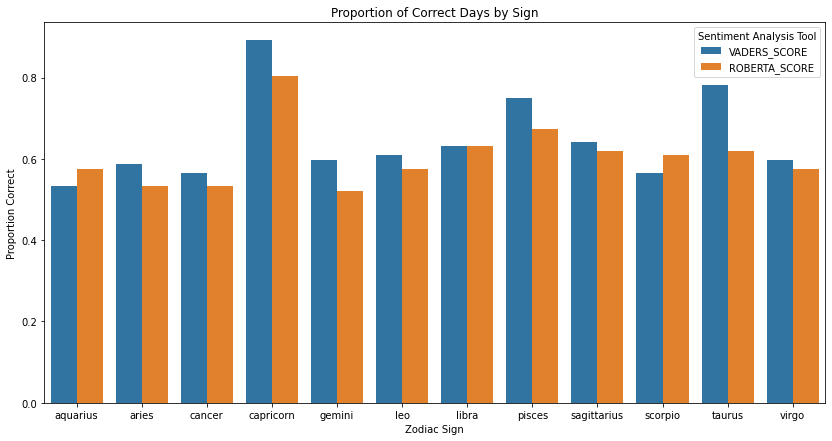

In [85]:
melted_scores = sign_scores.melt(id_vars=['SIGN'], value_vars=['VADERS_SCORE', 'ROBERTA_SCORE'])

plt.figure(figsize=(14,7))
sns.barplot(x='SIGN', y='value', hue='variable', data=melted_scores)
plt.title("Proportion of Correct Days by Sign")
plt.ylabel("Proportion Correct")
plt.xlabel("Zodiac Sign")
plt.legend(title='Sentiment Analysis Tool')
plt.show()